In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import load_2D_dataset
from utils.l_layer_application_utils import *

In [5]:
def model(x,y,learning_rate = 0.02, iterations = 40000, initialization = "he", print_cost = True, l2_reg = True, lambdaa= 10e-4, keep_prob = 0.9):
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20,3,1]
    if initialization == "random":
        parameters = initialize_parameters_type(layer_dims , "random")
    elif initialization == "zeros":
        parameters = initialize_parameters_type(layer_dims , "zeros")
    else:
        parameters = initialize_parameters_type(layer_dims ,"he")
    for i in range(iterations):
        AL, cache = forward(x,parameters, keep_prob)
        grads = L_model_backward(AL,y, cache, l2_reg = l2_reg, lambd_ = lambdaa, keep_prob = keep_prob)
        parameters = update_params(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            cost = compute_cost(AL,y, l2_reg = l2_reg, lambd_ = lambdaa, params = parameters,)
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

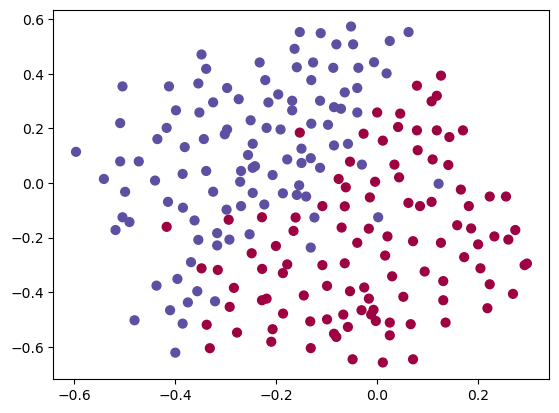

In [6]:
train_x, train_y, test_x, test_y = load_2D_dataset()

Cost after iteration 0: 0.6886346306219676
Cost after iteration 1000: 0.2669781883589199
Cost after iteration 2000: 0.23041964815944693
Cost after iteration 3000: 0.1990588513260894
Cost after iteration 4000: 0.21150415689183918
Cost after iteration 5000: 0.19519316869831568
Cost after iteration 6000: 0.16604553669331057
Cost after iteration 7000: 0.19394280485235182
Cost after iteration 8000: 0.21470958373403817
Cost after iteration 9000: 0.18763121350329418
Cost after iteration 10000: 0.15698950208018797
Cost after iteration 11000: 0.1736326517201985
Cost after iteration 12000: 0.15577424929488634
Cost after iteration 13000: 0.15722936776023314
Cost after iteration 14000: 0.15918648962724816
Cost after iteration 15000: 0.18325827345052437
Cost after iteration 16000: 0.17532653967004716
Cost after iteration 17000: 0.16102894060391051
Cost after iteration 18000: 0.18513651354550198
Cost after iteration 19000: 0.18173440462565513
Cost after iteration 20000: 0.17030645064840072
Cost afte

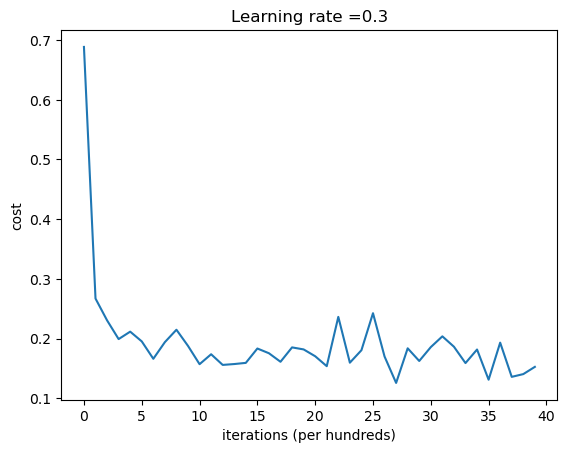

In [9]:
params = model(train_x, train_y,learning_rate = 0.3,iterations = 10000, keep_prob = 0.9, l2_reg = False)